In [1]:
import pandas as pd

import folium

In [2]:
# 위도
latitude = 35.17196626

# 경도
longitude = 129.1094255

In [3]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

In [4]:
folium.Marker([latitude, longitude],
              popup="수영구",
              tooltip="개미타이어").add_to(m)
m

In [5]:
import pandas as pd
df = pd.read_csv('busan_gu.csv', encoding='cp949')
df.head(3)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2.610000e+24,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2.630000e+24,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
2,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2.650000e+24,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,NaN,129.115397,35.143770


In [6]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [7]:
sub_df = df.loc[df['행정동명'].isin(['망미1동', '망미2동', '연산9동'])]
sub_df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
19,22117711,개미타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,2.650000e+24,NaN,부산광역시 수영구 망미번영로 49,613131,48219.0,NaN,NaN,NaN,129.109425,35.171966
81,15640181,부산정수기,NaN,D,소매,D07,가정/주방/인테리어,D07A05,정수기연수기,G47320,...,2.650000e+24,NaN,부산광역시 연제구 과정로 93-1,611810,47588.0,NaN,2,NaN,129.106931,35.179849
184,23985652,미성어패럴,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2.650000e+24,NaN,부산광역시 연제구 토곡남로20번길 44,611080,47587.0,NaN,NaN,NaN,129.103164,35.181407


In [8]:
sub_df[['위도','경도','상호명']]

,위도,경도,상호명
19,35.171966,129.109425,개미타이어
81,35.179849,129.106931,부산정수기
184,35.181407,129.103164,미성어패럴
245,35.186547,129.106901,본죽
330,35.170814,129.102329,이~뽀화장품
...,...,...,...
152719,35.181211,129.106894,아이젠핏
152742,35.175450,129.106992,김미김미
152795,35.183685,129.107389,센
152827,35.184660,129.109137,영영상점연산32호상점


In [21]:
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['위도', '경도']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="purple")).add_to(marker_cluster)
m

In [10]:
import requests
import json
r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/busan_gu.json')
c = r.content

busan_geo = json.loads(c)
busan_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '중구',
   'properties': {'code': '21010',
    'name': '중구',
    'name_eng': 'Jung-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[129.032, 35.116],
      [129.038, 35.112],
      [129.042, 35.111],
      [129.041, 35.108],
      [129.038, 35.104],
      [129.038, 35.098],
      [129.037, 35.097],
      [129.029, 35.096],
      [129.026, 35.096],
      [129.024, 35.1],
      [129.022, 35.102],
      [129.021, 35.106],
      [129.023, 35.109],
      [129.024, 35.109],
      [129.026, 35.111],
      [129.028, 35.11],
      [129.028, 35.115],
      [129.032, 35.116]]]}},
  {'type': 'Feature',
   'id': '서구',
   'properties': {'code': '21020',
    'name': '서구',
    'name_eng': 'Seo-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[129.023, 35.076],
      [129.021, 35.078],
      [129.018, 35.077],
      [129.017, 35.074],
      [129.019, 35.07]

In [22]:
m = folium.Map(
    location=[35.17196626,129.1094255],
    zoom_start=15, 
)

folium.GeoJson(
    busan_geo,
    name='수영구'
).add_to(m)

m

In [33]:
m = folium.Map(
    location=[35.17196626, 129.1094255],
    zoom_start=12, 
    tiles='stamen toner'
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

m

In [13]:
busan = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_부산_202206.csv',encoding='cp949')

busan = busan[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
busan

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,중구,숙박,모텔/여관/여인숙,35.100979,129.023668
1,동래구,음식,닭/오리요리,35.205267,129.087156
2,수영구,소매,의복의류,35.143770,129.115397
3,부산진구,음식,한식,35.151645,129.024938
4,사하구,생활서비스,사진,35.102905,128.974794
...,...,...,...,...,...
152896,남구,생활서비스,대행업,35.127425,129.068730
152897,기장군,소매,의복의류,35.192230,129.212806
152898,사하구,음식,커피점/카페,35.100133,128.984282
152899,북구,생활서비스,주택수리,35.214022,129.041703


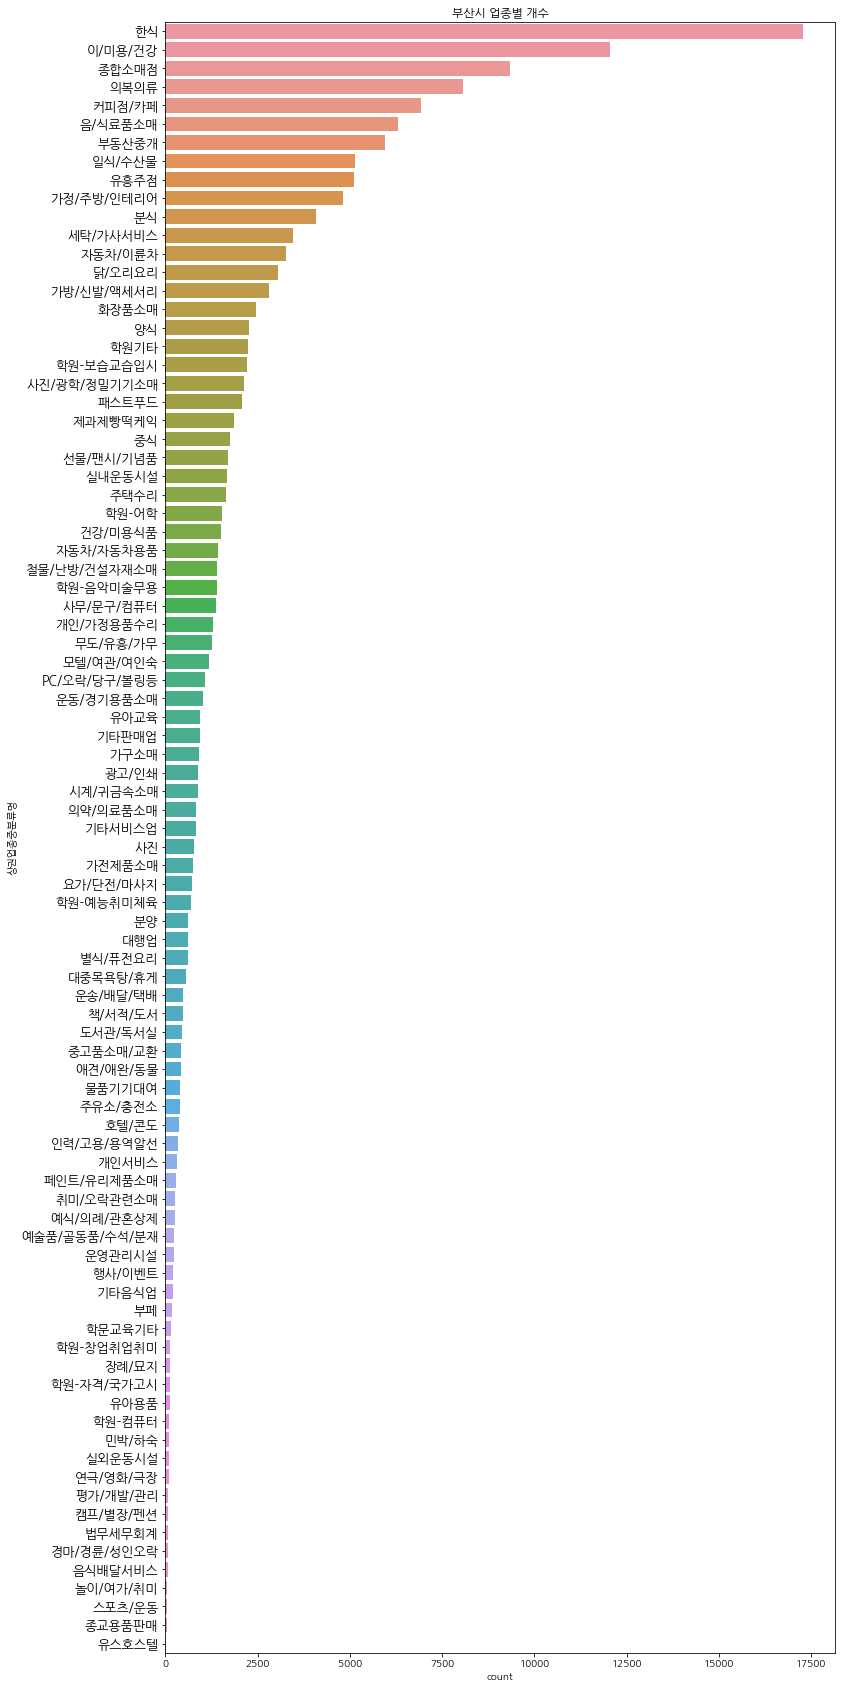

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30))
sns.countplot(y=busan['상권업종중분류명'], order=busan['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=13)
plt.title('부산시 업종별 개수')
plt.show()

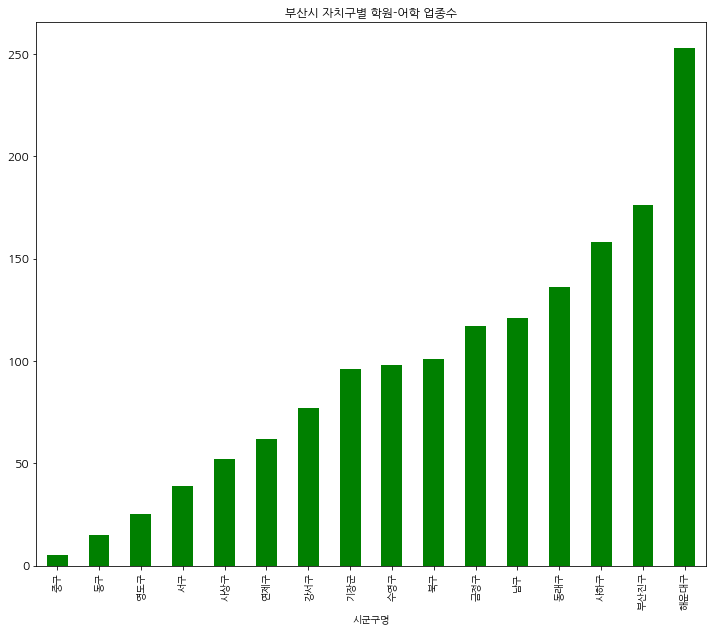

In [26]:
plt.figure(figsize=(12, 10))
busan.loc[busan['상권업종중분류명'] == '학원-어학'].groupby('시군구명')['상권업종대분류명'].count()\
                                                     .sort_values().plot(kind='bar', color='green')
plt.yticks(fontsize=12)
plt.title('부산시 자치구별 학원-어학 업종수')
plt.show()

In [16]:
busan_zuku = busan.loc[busan['상권업종중분류명'] == '학원-어학']
busan_zuku

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
18,동래구,학문/교육,학원-어학,35.196642,129.057535
108,사하구,학문/교육,학원-어학,35.096848,128.989287
172,수영구,학문/교육,학원-어학,35.142386,129.110988
253,부산진구,학문/교육,학원-어학,35.149294,129.035324
273,부산진구,학문/교육,학원-어학,35.151400,129.016572
...,...,...,...,...,...
152778,해운대구,학문/교육,학원-어학,35.154431,129.146569
152796,사상구,학문/교육,학원-어학,35.171507,128.990816
152822,북구,학문/교육,학원-어학,35.206358,129.012315
152854,금정구,학문/교육,학원-어학,35.225685,129.081936


In [27]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='Stamen Terrain'
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(busan_zuku['위도'], busan_zuku['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m


In [18]:
busan_group_data = busan.loc[busan['상권업종중분류명'] == '학원-어학'].groupby('시군구명')['상권업종중분류명'].count()
busan_group_data

시군구명
강서구      77
금정구     117
기장군      96
남구      121
동구       15
동래구     136
부산진구    176
북구      101
사상구      52
사하구     158
서구       39
수영구      98
연제구      62
영도구      25
중구        5
해운대구    253
Name: 상권업종중분류명, dtype: int64

In [30]:
m = folium.Map(
    location=[35.17196626, 129.1094255],
    zoom_start=11, 
    tiles='cartodb dark_matter'
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=busan_geo,
             data=busan_group_data, 
             fill_color='YlOrRd', 
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 학원-어학 업종 수"
            )
m


In [31]:
bins = list(busan_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodb dark_matter'
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=busan_geo,
             data=busan_group_data, 
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 커피 업종 수", 
             bins=bins
            )
m

m.save('busan.html')